# Model Development - Car Price Prediction

Here were going a to assess various madels in order to identify the best fitting model for car price preodiction based on our data.

Some questions we want to ask in this module

- Do I know if the dealer is offering fair value for my trade-in?
- Do I know if I put a fair value on my car?

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Linear Regression and Multiple Linear Regression](#0)<br>
2.  [Model Evaluation Using Visualization](#2)<br>
3.  [Polynomial Regression and Pipelines](#4) <br>
4.  [Measures for In-Sample Evaluation](#6) <br>
5.  [Prediction and Decision Making](#8) <br>

</div>

#### setup

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [9]:
df = pd.read_csv(path, header=0)

## 1. Linear Regression and Multiple Linear Regression<a id="0"></a>

### Linear Regression  _Yhat = a + bX_

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm = LinearRegression()
lm

LinearRegression()

#### How could "highway-mpg" help predict car price?

In [13]:
X = df[['highway-mpg']]
Y = df['price']

##### Fit the linear model using highway-mpg:

In [14]:
lm.fit(X,Y)

LinearRegression()

In [16]:
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

#### What is the value of the intercept (a)?

In [17]:
lm.intercept_

38423.305858157386

#### What is the value of the slope (b)?

In [18]:
lm.coef_

array([-821.73337832])

#### Final estimated linear model:    __Price__ = 38423.31 - 821.73 x __highway-mpg__

#### How could "engine-size" help predict car price?

In [21]:
# new Create a linear regression 
lm1 = LinearRegression()
lm1

LinearRegression()

In [22]:
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

#### Slope

In [23]:
lm1.coef_

array([[166.86001569]])

#### Intercept

In [24]:
lm1.intercept_

array([-7963.33890628])

#### Final estimated linear model: __Price__ = 166.86 -7963.33 x __engine-size__

###  Multiple Linear Regression   _Yhat = a + b_1X_1 +  b_2X_2 +  b_3X_3 +  b_4X_4_

From the data analysis section, we know that other good predictors of price could be:
    
- Horsepower
- Curb-weight
- Engine-size
- Highway-mpg

Let's develop a model using these variables as the predictor variables.
    

In [27]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

#### Fit the linear model

In [28]:
lm.fit(Z, df['price'])

LinearRegression()

In [29]:
lm.intercept_

-15806.624626329198

#### Final estimated linear model:  __Price__ = -15678.742628061467 + 52.65851272 x __horsepower__ + 4.69878948 x __curb-weight__ + 81.95906216 x __engine-size__ + 33.58258185 x __highway-mpg__

In [ ]:
extra model: Regression model  "normalized-losses" and "highway-mpg" to predict price

In [31]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])
lm2.coef_

array([   1.49789586, -820.45434016])

## 2. Model Evaluation Using Visualization <a id="2"></a>

In [32]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

#### Regression Plot

Let's visualize __highway-mpg__ as potential predictor variable of price:

(0.0, 48170.412018618335)

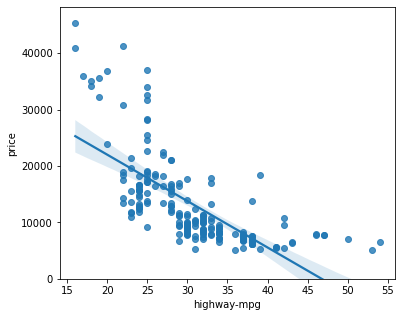

In [35]:
width = 6
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

_We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative._

Let's compare this plot to the regression plot of __"peak-rpm"__

(0.0, 47414.1)

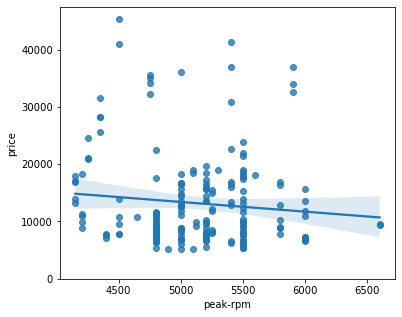

In [37]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [40]:
# The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616. You can verify it using the following command:

df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


#### Residual Plot

__Note:__ - If the points in a residual plot are __randomly spread out around the x-axis__, then a __linear model is appropriate__ for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

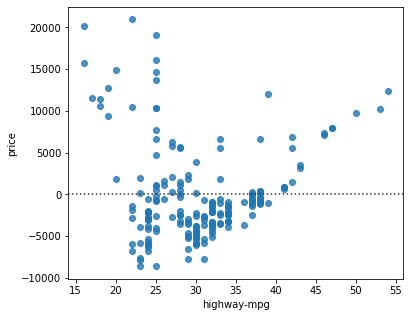

In [42]:
width = 6
height = 5
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

_The residuals are not randomly spread around the x-axis, thus a non-linear model is more appropriate for this data._

#### Multiple Linear Regression evaluation

To do this a comparison of the __distibution plot__ of fitted values(price prediction results)  vs distribution of the actual price values

In [44]:
Y_hat = lm.predict(Z)

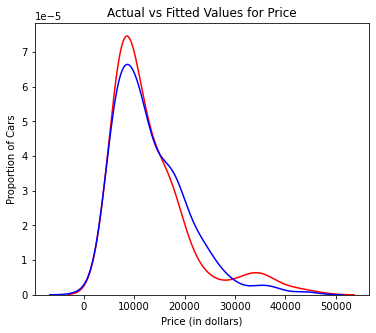

In [46]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

_We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement._

## 3. Polynomial Regression and Pipelines <a id="4"></a>

In [49]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [50]:
x = df['highway-mpg']
y = df['price']

Let's fit the polynomial using the function __polyfit__, <br>
then use the function __poly1d__ to display the polynomial function

In [51]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


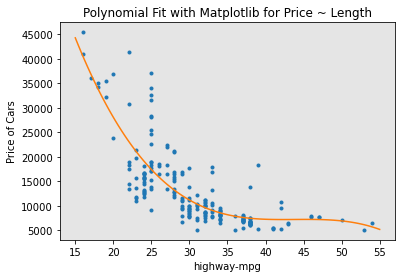

In [52]:
PlotPolly(p, x, y, 'highway-mpg')

In [53]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


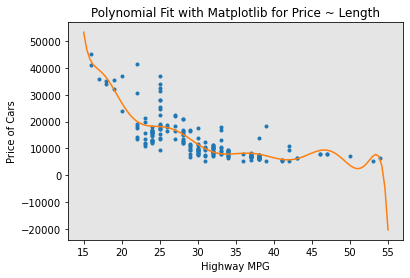

In [54]:
# Here we use a polynomial of the 11rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [57]:
#we import the module

from sklearn.preprocessing import PolynomialFeatures

In [58]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [59]:
Z_pr=pr.fit_transform(Z)

In [60]:
Z.shape

(201, 4)

In [61]:
Z_pr.shape

(201, 15)

### Pipeline

Let's simpify data processind with __Pipeline__ ,  __StandardScaler__ will be used as a step in our pipeline

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [64]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [65]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [66]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [67]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [68]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

## 4. Measures for In-Sample Evaluation <a id="6"></a>

 __model accuracy measures:__
- __R^2 / R-squared__ is a measure to indicate how close the data is to the fitted regression line
- __Mean Squared Error (MSE)__  measure the difference between actual value (y) and the estimated value (ŷ).

### Model 1: Simple Linear Regression

##### Let's calculate the R^2:

In [69]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339175


_~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit"._

##### Let's calculate the MSE:

In [70]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


import the function __mean_squared_error__ from the module __metrics__:

In [71]:
from sklearn.metrics import mean_squared_error

In [ ]:
Now compare the predicted results with the actual results:

In [72]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


### Model 2: Multiple Linear Regression

##### Let's calculate the R^2:

In [74]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


_We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit"._

##### Let's calculate the MSE.

In [75]:
#We produce a prediction:

Y_predict_multifit = lm.predict(Z)

In [76]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


### Model 3: Polynomial Fit

##### Let's calculate the R^2.

Let’s import the function __r2_score__ from the module __metrics__ as we are using a different function.

In [77]:
from sklearn.metrics import r2_score

We apply the function to get the value of R^2:

_We can say that ~67.419 % of the variation of price is explained by this polynomial fit._

#####  Let's calculate the MSE.

In [79]:
mean_squared_error(df['price'], p(x))

20474146.426361218

## 5. Prediction and Decision Making <a id="8"></a>

### Prediction

we trained the model using the method fit. <br>
Now we will use the method __predict__ to produce a prediction. <br>
Lets import __pyplot__ for plotting; <br>
we will also be using some functions from __numpy__.<br>

In [80]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [81]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

##### Fit the model:

In [82]:
lm.fit(X, Y)
lm

LinearRegression()

##### Produce a prediction:

In [87]:
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

##### Plot the data

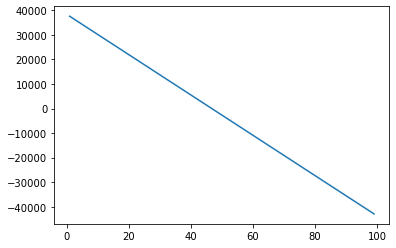

In [88]:
plt.plot(new_input, yhat)
plt.show()

#### Decision Making: Determining a Good Model Fit

Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

  - What is a good R-squared value?
When comparing models, __the model with the higher R-squared value is a better fit__ for the data.

  - What is a good MSE?
When comparing models, __the model with the smallest MSE value is a better fit__ for the data.

#### Let's take a look at the values for the different models. <br>
Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.<br>

 - R-squared: 0.49659118843391759 <br>
 - MSE: 3.16 x10^7 <br>

Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price. <br> 

 - R-squared: 0.80896354913783497 <br>
 - MSE: 1.2 x10^7 <br>
 
Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price. <br>

 - R-squared: 0.6741946663906514 <br>
 - MSE: 2.05 x 10^7 <br>

#### Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)

Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data,<br>
you may run into numerical problems, or many of the variables may not be useful and even act as noise. 
As a result, __you should always check the MSE and R^2.__

In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

 - __MSE:__ The MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.
 - __R-squared:__ In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. <br>
   The R-squared for the SLR (~ 0.497) is very small compared to the R-squared for the MLR (~ 0.809).

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.

#### Simple Linear Model (SLR) vs. Polynomial Fit

 - __MSE:__ We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
 - __R-squared:__ The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.

Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, <br>
we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.

#### Multiple Linear Regression (MLR) vs. Polynomial Fit

 - __MSE:__ The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
 - __R-squared:__ The R-squared for the MLR is also much larger than for the Polynomial Fit.

### Conclusion

Comparing these three models, we conclude that __the MLR model is the best model__ to be able to predict price from our dataset. <br>
This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.